# PacktPublishing/Deep-Learning-with-PyTorch

In [1]:
import torch
torch.__version__

'1.7.1'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from torch.autograd import Variable

# First Neural Network Using Pytorch¶
We present our first neural network which learns to map training examples (input array) to targets (output array). Lets assume that we work for one of the largest online companies called Wondemovies, which is into serving videos on-demand. Our training dataset contains a feature which represents average hours spent by users watching movies in the platform, we would like to predict how much time each user would spend on the platform in the coming week. Its just a imaginary use case, don't think too much about it. Some of the high level activities for building such a solution are:

1. Data preperation : get_data() function prepares the tensors (arrays) containing input and output data.
2. Create learnable parameters : get_weights() function provides us with tensors containing random values , which we will optimize to solve our problem.
3. Network Model : simple_network() produces the output for the input data applying a linear rule , multiply weights with input data and add the bias term (y = Wx+b).
4. Loss : loss_fn() provides information about how good the model is.
5. Optimizer : optimize() function helps us in adjusting random weights created initially to help the model calculate target

In [3]:
#Training Data
def get_data():
    train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
    train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
    
    dtype= torch.FloatTensor
    X=Variable(torch.from_numpy(train_X).type(dtype),requires_grad=False).view(17,1)
    y=Variable(torch.from_numpy(train_Y).type(dtype),requires_grad=False)
    return X,y

def plot_variable(x,y,z='', **kwargs):
    l = []
    for a in [x,y]:
        l.append(a.data.numpy())
    plt.plot(l[0],l[1],z,**kwargs)

In [4]:
#Get Weights, Bias
def get_weights():
    w=Variable(torch.randn(1),requires_grad=True)
    b=Variable(torch.randn(1),requires_grad=True)
    return w,b

In [5]:
#Make Network
def simple_network(x):
    y_pred = torch.matmul(x,w)+b
    return y_pred

In [6]:
#Loss function
def loss_fn(y,y_pred):
    loss= (y_pred-y).pow(2).sum()
    for param in [w,b]:
        if not param.grad is None: param.grad.data.zero_()
    loss.backward()
    return loss.item()

In [7]:
#Optimizer
def optimize(learning_rate):
    w.data -= learning_rate * w.grad.data
    b.data -= learning_rate * b.grad.data

learning_rate = 1e-4

In [8]:
x,y = get_data()
w,b = get_weights()
for i in range(500):
    y_pred = simple_network(x)
    loss = loss_fn(y,y_pred)
    if i % 50 == 0:
        print(loss)
    optimize(learning_rate)

6535.015625
4.6580810546875
4.575124740600586
4.495884418487549
4.419849395751953
4.346886157989502
4.276876926422119
4.2096943855285645
4.145231246948242
4.0833740234375


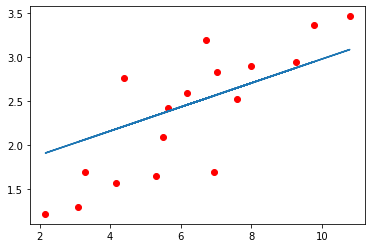

In [9]:
x_numpy = x.data.numpy()
plot_variable(x,y,'ro')
plot_variable(x,y_pred, label='Fitted Line')